You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

In [2]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

In [3]:
x_l = x_l.reshape(2062, -1)

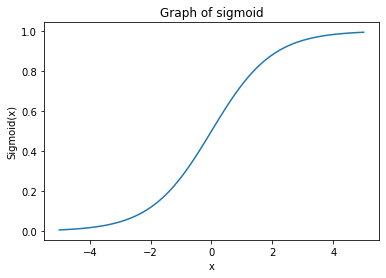

In [4]:
x = np.linspace(-5, 5, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel('x') 
plt.ylabel('Sigmoid(x)')
plt.title('Graph of sigmoid')
plt.show()

### Multiclass classification
**Logistic regression** can only be used for two class problems where the output label is binary like a **yes** or **no**, **true** or **false** case. To use Logistic Regression for multiple classes there are two methods that we can use :-
1. **One Vs One**: in this method we need to consider $K \choose 2$ classifiers *(K = number of classes)* one for each pair of classes. To build it we need to extract only those data point *(samples)* belonging to these classes. For testing we need to use all the $K \choose 2$ classifiers and count the frequencies for each class. Finally we predict the label *(class)* with the maximum frequency.
2. **One Vs All**: in this method we need to consider $K$ classifiers one for each class. For each classifier the data belonging to that class is labeled as 1 and everything else as 0, which converts it into a two class *(binary)* problem.

In [5]:
# Logistic Regression
class MyLogisticRegression:
    def __init__(self, train_data, Y):
        self.data = train_data  # It is assumed that data is normalized and shuffled (rows, cols)
        self.Y = Y[:, np.newaxis]
        self.b = np.random.randn()
        self.cols = self.data.shape[1]
        self.rows = self.data.shape[0]
        self.weights = np.random.randn(self.cols, 1)  # Initialising weights to 1, shape (cols, 1)
        self.num_iterations = 500
        self.learning_rate = 0.0001
        self.batch_size = 30
    
    @staticmethod
    def sigmoid(x):
        return 1/(1 + np.exp(-x))
        
    def calc_mini_batches(self):
        new_data = np.hstack((self.data, self.Y))
        np.random.shuffle(new_data)
    
        rem = self.rows % self.batch_size
        num = self.rows // self.batch_size
        till = self.batch_size * num
        if num > 0:
            dd = np.array(np.vsplit(new_data[ :till, :], num))
            X_batch = dd[:, :, :-1]
            Y_batch = dd[:, :, -1]
            
        return X_batch, Y_batch

    def update_weights(self, X, Y):
        Y_predicted = self.predict(X) # Remember that X has data stored along the row for one sample
        gradient = np.dot(np.transpose(X), Y_predicted - Y)
        self.b = self.b - np.sum(Y_predicted - Y)
        self.weights = self.weights - (self.learning_rate * gradient) # vector subtraction
    
    def print_error(self):
        Y_Predicted = self.predict(self.data)
        class_one = self.Y == 1
        class_two = np.invert(class_one)
        val = np.sum(np.log(Y_Predicted[class_one]))
        val += np.sum(np.log(1 - Y_Predicted[class_two]))
        print(-val)
    
    def gradient_descent(self):
        for j in range(self.num_iterations):
            X, Y = self.calc_mini_batches()
            num_batches = X.shape[0]
            for i in range(num_batches):
                self.update_weights(X[i, :, :], Y[i, :][:, np.newaxis])  # update the weights
            if (j+1)%500 == 0:
                self.print_error()
    
    def predict(self, X):
        # X is 2 dimensional array, samples along the rows
        return self.sigmoid(np.dot(X, self.weights) + self.b)

## One VS Rest Classifier

In [ ]:
log_regressors_ova = []
for i in range(10):
    mask = y_l[:,i] >= 1.0 - 1e-6
    others = np.invert(mask)
    x_pos = x_l[mask]
    x_neg = x_l[others]
    y_pos = [1]*len(x_pos)
    y_neg = [0]*len(x_neg)
    y_new = y_pos + y_neg
    y_new = np.array(y_new)
    x_new = np.vstack((x_pos, x_neg))
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, shuffle=True)
    reg = MyLogisticRegression(x_train, y_train)
    reg.gradient_descent()
    y_pred = reg.predict(x_test)
    pred = y_pred >= 0.5
    pred = pred.astype(int)
    log_regressors_ova.append(reg)

### My Model

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.30, shuffle=True)
y_test = np.argmax(y_test, axis=1)
preds = np.zeros((x_test.shape[0], 10))
for i in range(10):
    reg = log_regressors_ova[i]
    y_pred = reg.predict(x_test)
    preds[:, i] = y_pred.flatten()
final_pred = np.argmax(preds, axis=1)
print('accuracy : {a}'.format(a=accuracy_score(y_test, final_pred)))
print('f1 score : {a}'.format(a = f1_score(y_test, final_pred, average='weighted')))
sns.heatmap(confusion_matrix(y_test, final_pred))

accuracy : 0.6252019386106623
f1 score : 0.6135143865654283


### Scikit Learn Model

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.30, shuffle=True)
clf = LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr')
clf.fit(x_train, np.argmax(y_train, axis=1))
pred = clf.predict(x_test)

In [115]:
y_test = np.argmax(y_test, axis=1)
print('accuracy : {a}'.format(a=accuracy_score(y_test, pred)))
print('f1 score : {a}'.format(a = f1_score(y_test, pred, average='weighted')))
sns.heatmap(confusion_matrix(y_test, pred))

accuracy : 0.7609046849757674
f1 score : 0.7615100447146925


## One Vs One classifier

In [ ]:
log_regressors_ovo = []
for i in range(10):
    for j in range(i+1,10):
        mask1 = (y_l[:, i] >= 1.0 - 1e-6)
        mask0 = (y_l[:, j] >= 1.0 - 1e-6)
        x_pos = x_l[mask1]
        x_neg = x_l[mask0]
        y_pos = [1]*(x_pos.shape[0])
        y_neg = [0]*(x_neg.shape[0])
        y_new = y_pos + y_neg
        y_new = np.array(y_new)
        x_new = np.vstack((x_pos, x_neg))
        x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.20, shuffle=True)
        reg = MyLogisticRegression(x_train, y_train)
        reg.gradient_descent()
        y_pred = reg.predict(x_test)
        pred = y_pred >= 0.5
        pred = pred.astype(int)
        log_regressors_ovo.append(reg)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.30, shuffle=True)
predictions = np.zeros((x_test.shape[0], len(log_regressors_ovo)))
ind = 0
for i in range(10):
    for j in range(i+1, 10):
        reg = log_regressors_ovo[ind]
        y_pred = reg.predict(x_test)
        predictions[(y_pred >= 0.5).flatten(), ind] = i
        predictions[(y_pred < 0.5).flatten(), ind] = j
        ind += 1

### My Model

accuracy : 0.6607431340872375
f1 score : 0.6573875286236148


<AxesSubplot:>

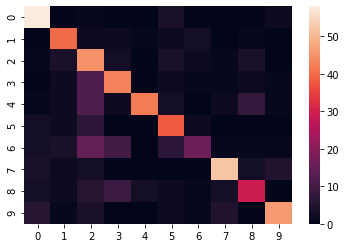

In [143]:
def give_max(x):
    return np.argmax(np.bincount(x))
final_pred = np.vectorize(give_max,signature='(n)->()')(predictions.astype(int))
y_test = np.argmax(y_test, axis=1)
print('accuracy : {a}'.format(a=accuracy_score(y_test, final_pred)))
print('f1 score : {a}'.format(a = f1_score(y_test, final_pred, average='weighted')))
sns.heatmap(confusion_matrix(y_test, final_pred))

### Scikit Learn Model

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.30, shuffle=True)
clf = OneVsOneClassifier(LogisticRegression(random_state=42, max_iter=10000))
clf.fit(x_train, np.argmax(y_train, axis=1))
pred = clf.predict(x_test)

accuracy : 0.8109854604200323
f1 score : 0.8118301573795765


<AxesSubplot:>

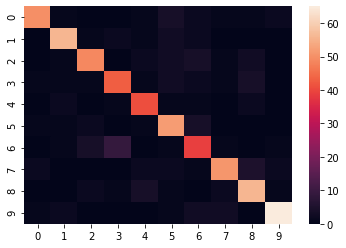

In [157]:
y_test = np.argmax(y_test, axis=1)
print('accuracy : {a}'.format(a=accuracy_score(y_test, pred)))
print('f1 score : {a}'.format(a = f1_score(y_test, pred, average='weighted')))
sns.heatmap(confusion_matrix(y_test, pred))

### Bonus

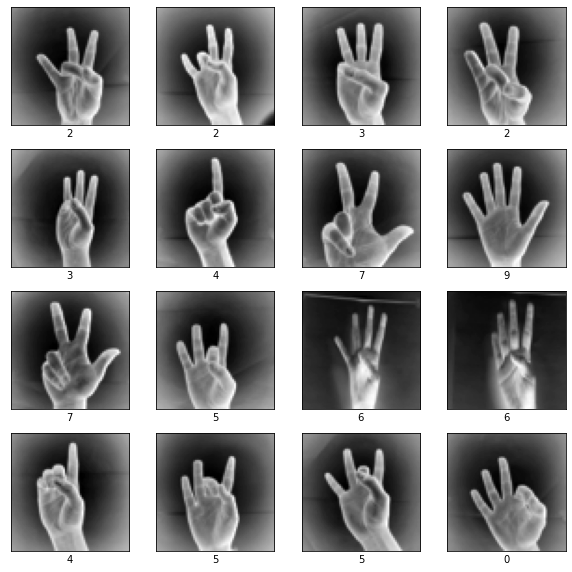

In [7]:
x_l = x_l.reshape(2062, 64, 64)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.10, shuffle=True)


plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_test[i])]) # this is done to get the index where one is present
plt.show()